## Deforestation Impact

The deforestation (or land use change) due to commodity driven agriculture is a useful measure of the impact a comapnys supply chain has on nature.

Here we attempt to measure the likelihood that deforestation in an area is due to the presence of some commodity production, as well as the impact on the quality of forest as a result.

A supply chain should aim to minimise the amount of deforestation as a result of it's presence, as per SDG targets 15.1 and 15.2.


Potential datasets:

- 

### Import libraries:

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import rasterio as rio
import rasterio.plot
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
import time
from rasterstats import gen_zonal_stats, gen_point_query
from shapely.geometry import shape, mapping
import folium
from rasterstats import gen_zonal_stats, gen_point_query
import h3
import os

/Users/vizzuality/anaconda3/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from processing.geolocating_data import GeolocateAddress

## Inspect Satelligence Data
 
 
As per SDG 15.1 and 15.2 - we are interested in:

- 15.1.1 - Forest Area as a proportion of Land.
- 15.2.1 - Progress towards sustainable forest management

We should extract the % area cover of forest in the region, as well as change.


In [3]:
input_path = '../../datasets/raw/satelligence_sample_data'

os.listdir(input_path)

['change_detection',
 '.DS_Store',
 'IND_Riau_outline.prj',
 'forest_and_plantation_baseline',
 'carbonstock',
 'IDN_Riau_outline.geojson',
 'IND_Riau_outline.shx',
 'IND_Riau_outline.shp',
 'IND_Riau_outline.cpg',
 'IND_Riau_outline.dbf',
 'IDN_Riau_Baseline_2019']

In [4]:
baseline_path =  input_path + '/forest_and_plantation_baseline'
change_path =  input_path + '/change_detection'

In [5]:
# Baseline Forest

files = [f"/{f}" for f in os.listdir(baseline_path) if '.tif' in f]
files

['/IDN_Riau_Forest_and_plantation_baseline_20180101.tif.aux.xml',
 '/IDN_Riau_Forest_and_plantation_baseline_20180101.tif',
 '/IDN_Riau_baseline_2019.tif']

In [6]:
file = baseline_path + files[1]

#explore datasets info for calculation - the three raster need to have the same extent and projection
baseline_info = !gdalinfo $file
baseline_info

['Driver: GTiff/GeoTIFF',
 'Files: ../../datasets/raw/satelligence_sample_data/forest_and_plantation_baseline/IDN_Riau_Forest_and_plantation_baseline_20180101.tif',
 '       ../../datasets/raw/satelligence_sample_data/forest_and_plantation_baseline/IDN_Riau_Forest_and_plantation_baseline_20180101.tif.aux.xml',
 'Size is 14063, 14995',
 'Coordinate System is:',
 'GEOGCRS["WGS 84",',
 '    DATUM["World Geodetic System 1984",',
 '        ELLIPSOID["WGS 84",6378137,298.257223563,',
 '            LENGTHUNIT["metre",1]]],',
 '    PRIMEM["Greenwich",0,',
 '        ANGLEUNIT["degree",0.0174532925199433]],',
 '    CS[ellipsoidal,2],',
 '        AXIS["latitude",north,',
 '            ORDER[1],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '        AXIS["longitude",east,',
 '            ORDER[2],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '    ID["EPSG",4326]]',
 'Data axis to CRS axis mapping: 2,1',
 'Origin = (100.024529999999999,2.918900000000000)',
 'Pixel Size 

In [7]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#ffffff','#9bff8f','#73a367'])

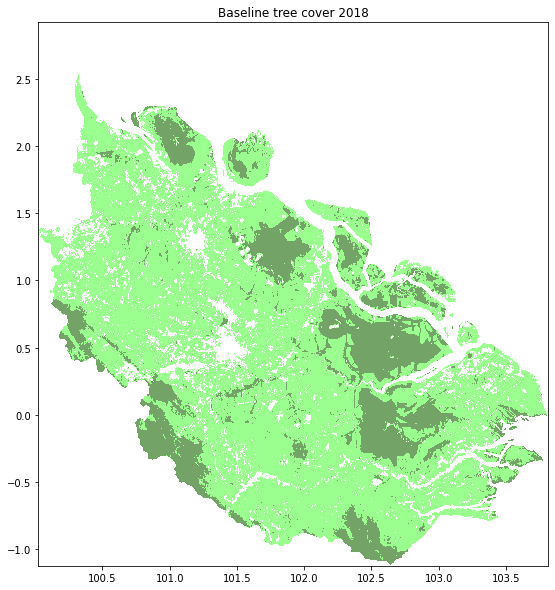

In [8]:
#check 2018 baseline

# Legend
# 0 Non forest  
# 1 Forest
# 2 Primary Forest

with rio.open(file) as src:
    image_array = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(image_array, vmin=0, vmax=2, cmap=custom_cmap, ax=ax, transform=src.transform)
    ax.set_title('Baseline tree cover 2018')
    
    

In [83]:
file = baseline_path + files[2]

#explore datasets info for calculation - the three raster need to have the same extent and projection
baseline_info = !gdalinfo $file
baseline_info

IndexError: list index out of range

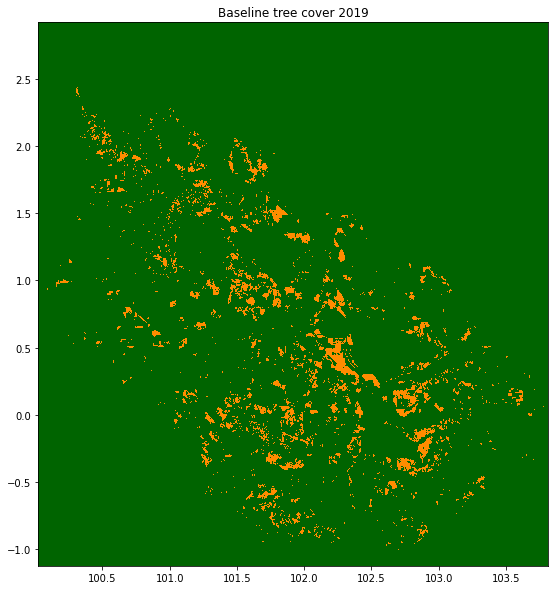

In [84]:
#check calculated risk map

custom_cmap = ListedColormap(["darkgreen","#5eb342","#3dd00d","#ffd60e","darkorange"])

# Legend
# 1 Primary Forest
# 2 Logged over Forest
# 3 Degraded or regenerating Forest
# 4 Other plantations
# 5 Palm oil plantations

with rio.open(file) as src:
    image_array = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(image_array, vmin=0, vmax=5, cmap=custom_cmap, ax=ax, transform=src.transform)
    ax.set_title('Baseline tree cover 2019')
    
    

In [85]:
# Forest change

files = [f"/{f}" for f in os.listdir(change_path) if '.tif' in f]
files

['/IDN_Riau_ChangeDetection_ForestAndPlantations.tif']

In [86]:
file = change_path + files[0]

#explore datasets info for calculation - the three raster need to have the same extent and projection
change_info = !gdalinfo $file
change_info

['Driver: GTiff/GeoTIFF',
 'Files: ../../datasets/raw/satelligence_sample_data/change_detection/IDN_Riau_ChangeDetection_ForestAndPlantations.tif',
 'Size is 14063, 14995',
 'Coordinate System is:',
 'GEOGCRS["WGS 84",',
 '    DATUM["World Geodetic System 1984",',
 '        ELLIPSOID["WGS 84",6378137,298.257223563,',
 '            LENGTHUNIT["metre",1]]],',
 '    PRIMEM["Greenwich",0,',
 '        ANGLEUNIT["degree",0.0174532925199433]],',
 '    CS[ellipsoidal,2],',
 '        AXIS["latitude",north,',
 '            ORDER[1],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '        AXIS["longitude",east,',
 '            ORDER[2],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '    ID["EPSG",4326]]',
 'Data axis to CRS axis mapping: 2,1',
 'Origin = (100.024529999999999,2.918900000000000)',
 'Pixel Size = (0.000269494417976,-0.000269495165055)',
 'Metadata:',
 '  AREA_OR_POINT=Area',
 'Image Structure Metadata:',
 '  COMPRESSION=DEFLATE',
 '  INTERLEAVE=BAND',
 '  

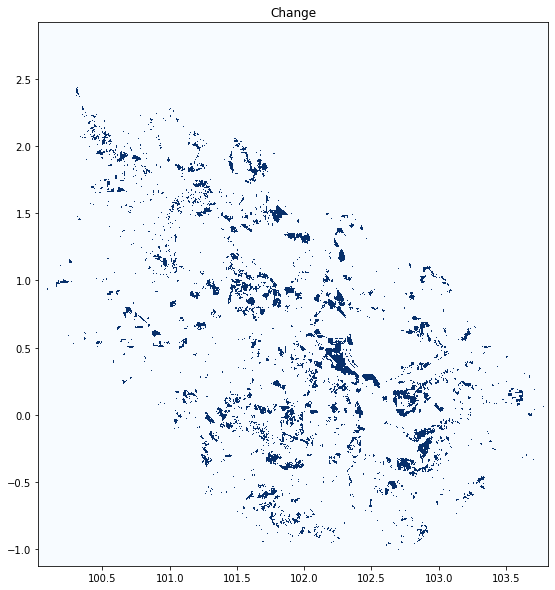

In [87]:
#check calculated risk map

# Values in format YYYY-jjj e.g. 2019074 where jjj = julian day from 1-366

with rio.open(file) as src:
    image_array = src.read(1)
    meta = src.meta
    profile = src.profile
    
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(image_array, vmin=0, vmax=5, cmap='Blues', ax=ax, transform=src.transform)
    ax.set_title('Change')
    
    

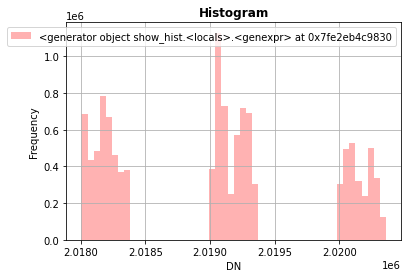

In [88]:
src = rio.open(file)
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

In [89]:
image_array.shape

(14995, 14063)

In [90]:
## Set values to year
loss2018_array = image_array.copy()

loss2018_array[(loss2018_array >= 2018000) & (loss2018_array < 2019000)] = 1
loss2018_array[loss2018_array >= 2019000] = 0

Text(0.5, 1.0, 'Change')

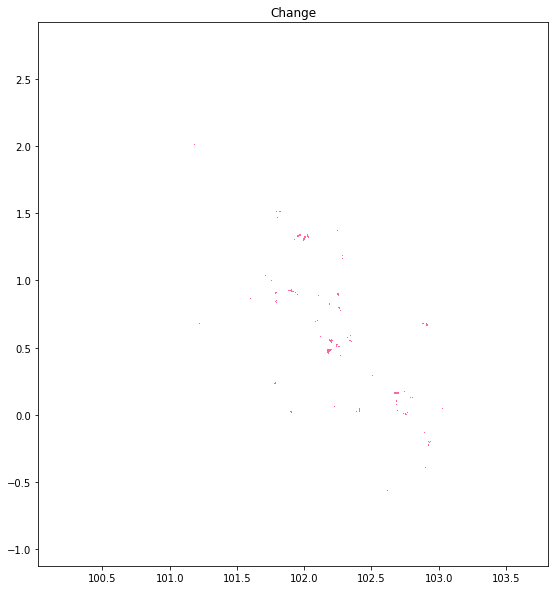

In [91]:
custom_cmap = ListedColormap(["white", "#f69"])

fig, ax = plt.subplots(figsize=[15,10])
rio.plot.show(loss2018_array, vmin=0, vmax=1, cmap=custom_cmap, ax=ax, transform=src.transform)
ax.set_title('Change')

In [92]:
output_path = '../../datasets/processed/'

os.listdir(input_path)

['change_detection',
 '.DS_Store',
 'IND_Riau_outline.prj',
 'forest_and_plantation_baseline',
 'carbonstock',
 'IDN_Riau_outline.geojson',
 'IND_Riau_outline.shx',
 'IND_Riau_outline.shp',
 'IND_Riau_outline.cpg',
 'IND_Riau_outline.dbf',
 'IDN_Riau_Baseline_2019']

In [93]:
meta

{'count': 1,
 'crs': CRS.from_dict(init='epsg:4326'),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 14995,
 'nodata': -3.4028234663852886e+38,
 'transform': Affine(0.0002694944179762499, 0.0, 100.02453,
       0.0, -0.00026949516505501834, 2.9189),
 'width': 14063}

In [94]:
## Save as rio dataset

with rasterio.open(output_path + 'sat_loss_2018.tif', "w", **profile) as dest:
    dest.write(loss2018_array, 1)
    
loss2018_array = None

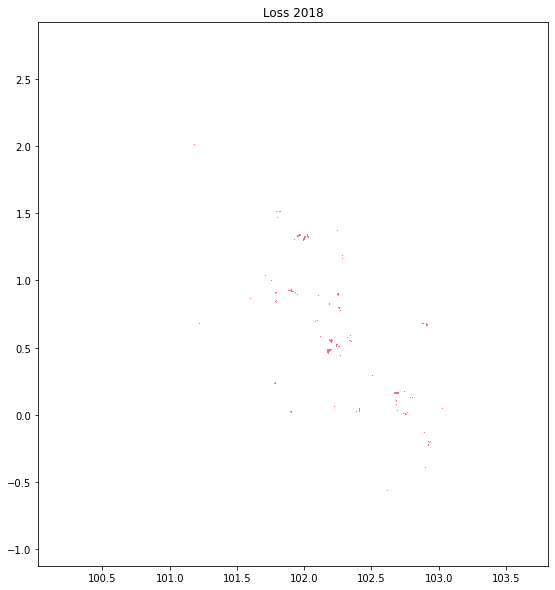

In [95]:
# open again

custom_cmap = ListedColormap([ "white", "#f69"])

with rio.open(output_path + 'sat_loss_2018.tif') as src:
    image_array = src.read(1)
    meta = src.meta
    profile = src.profile
    
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(image_array, vmin=0, vmax=1, cmap=custom_cmap, ax=ax, transform=src.transform)
    ax.set_title('Loss 2018')
    
    

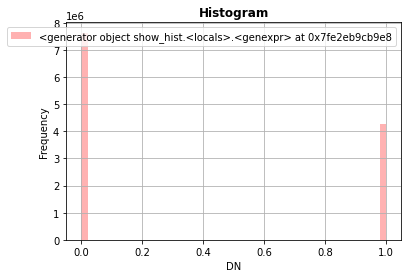

In [96]:
src = rio.open(output_path + 'sat_loss_2018.tif')
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

In [97]:
## Dump cache
image_array = None

### Calculation of Commodity-driven Deforestation Risk (risk map)

Using the Harvested Area fraction (f) from Earthstat, Deforestation Risk (Dr) is the binary Deforestation pixels (D) multiplied by the Harvested Area fraction (f), and gives a naive likelihood that the deforestation event is a result of the commodity. 

`Dr = f.D`

This is indipendent of yeild or volume and gives a general indication of deforesation risk.

In [28]:
ha_fraction_path = '../../datasets/raw/cotton_HarvestedAreaFraction.tif'
defor_path = output_path + 'sat_loss_2018.tif'

In [31]:
info = !gdalinfo $defor_path
info

['Driver: GTiff/GeoTIFF',
 'Files: ../../datasets/processed/sat_loss_2018.tif',
 'Size is 14063, 14995',
 'Coordinate System is:',
 'GEOGCRS["WGS 84",',
 '    DATUM["World Geodetic System 1984",',
 '        ELLIPSOID["WGS 84",6378137,298.257223563,',
 '            LENGTHUNIT["metre",1]]],',
 '    PRIMEM["Greenwich",0,',
 '        ANGLEUNIT["degree",0.0174532925199433]],',
 '    CS[ellipsoidal,2],',
 '        AXIS["latitude",north,',
 '            ORDER[1],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '        AXIS["longitude",east,',
 '            ORDER[2],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '    ID["EPSG",4326]]',
 'Data axis to CRS axis mapping: 2,1',
 'Origin = (100.024529999999999,2.918900000000000)',
 'Pixel Size = (0.000269494417976,-0.000269495165055)',
 'Metadata:',
 '  AREA_OR_POINT=Area',
 'Image Structure Metadata:',
 '  COMPRESSION=DEFLATE',
 '  INTERLEAVE=BAND',
 'Corner Coordinates:',
 'Upper Left  ( 100.0245300,   2.9189000) (100d 

In [38]:
## projwin: upper left and lower right of the raster that we want to use for clipping the other rasters
# e.g. !gdal_translate -projwin <ul_lat> <ul_lon> <lr_lat>  <lr_lon>

## -of GTiff: geotiff we want to clip - change extent
# e.g. -of GTiff <input> <output>

clipped_output = '../../datasets/processed/cotton_HarvestedAreaFraction_clipped.tif'

!gdal_translate -projwin 100.0245300 2.9189000 103.8144300 -1.1221800 -of GTiff $ha_fraction_path $clipped_output

Input file size is 4320, 2160
ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
0...10...20...30...40...50...60...70...80...90...100 - done.


In [39]:
info = !gdalinfo $clipped_output
info

['Driver: GTiff/GeoTIFF',
 'Files: ../../datasets/raw/cotton_HarvestedAreaFraction_clipped.tif',
 'Size is 45, 48',
 'Coordinate System is:',
 'GEOGCRS["WGS 84",',
 '    DATUM["World Geodetic System 1984",',
 '        ELLIPSOID["WGS 84",6378137,298.257223563,',
 '            LENGTHUNIT["metre",1]]],',
 '    PRIMEM["Greenwich",0,',
 '        ANGLEUNIT["degree",0.0174532925199433]],',
 '    CS[ellipsoidal,2],',
 '        AXIS["latitude",north,',
 '            ORDER[1],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '        AXIS["longitude",east,',
 '            ORDER[2],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '    ID["EPSG",4326]]',
 'Data axis to CRS axis mapping: 2,1',
 'Origin = (99.999999999984084,2.999999999994714)',
 'Pixel Size = (0.083333333333329,-0.083333333333329)',
 'Metadata:',
 '  AREA_OR_POINT=Area',
 '  TIFFTAG_SOFTWARE=MATLAB 8.0, Mapping Toolbox 3.6',
 'Image Structure Metadata:',
 '  INTERLEAVE=BAND',
 'Corner Coordinates:',
 'Upper L

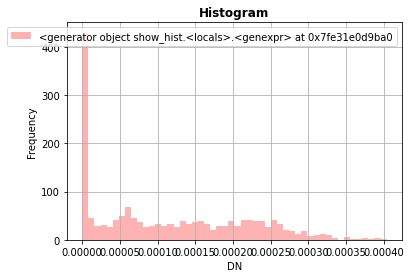

In [46]:
src = rio.open(clipped_output)
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")


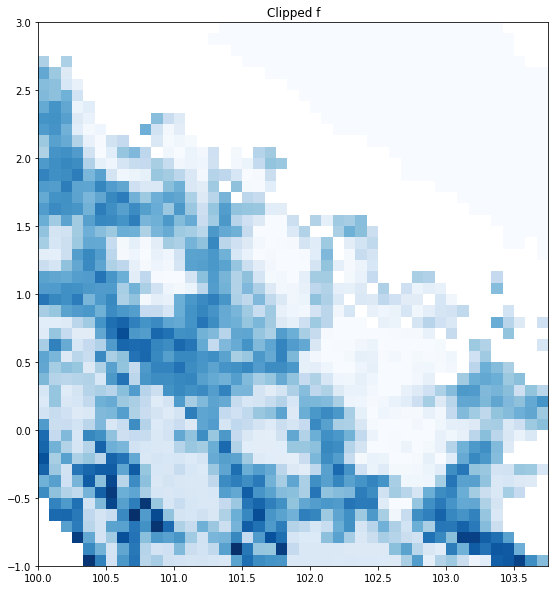

In [48]:
with rio.open(clipped_output) as src:
    image_array = src.read(1)
    meta = src.meta
    profile = src.profile
    
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(image_array, vmin=0, vmax=4e-4, cmap='Blues', ax=ax, transform=src.transform)
    ax.set_title('Clipped f')

In [ ]:
## Resample and multiply

In [64]:
resampled_output = '../../datasets/processed/cotton_HarvestedAreaFraction_resampled_30m.tif'
!gdalwarp -tr 0.000269494417976 0.000269495165055 -r mode -of GTiff $clipped_output $resampled_output

ERROR 1: Output dataset ../../datasets/processed/cotton_HarvestedAreaFraction_resampled_30m.tif exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.



In [52]:
info = !gdalinfo $resampled_output
info

['Driver: GTiff/GeoTIFF',
 'Files: ../../datasets/processed/cotton_HarvestedAreaFraction_resampled_30m.tif',
 'Size is 13915, 14843',
 'Coordinate System is:',
 'GEOGCRS["WGS 84",',
 '    DATUM["World Geodetic System 1984",',
 '        ELLIPSOID["WGS 84",6378137,298.257223563,',
 '            LENGTHUNIT["metre",1]]],',
 '    PRIMEM["Greenwich",0,',
 '        ANGLEUNIT["degree",0.0174532925199433]],',
 '    CS[ellipsoidal,2],',
 '        AXIS["latitude",north,',
 '            ORDER[1],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '        AXIS["longitude",east,',
 '            ORDER[2],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '    ID["EPSG",4326]]',
 'Data axis to CRS axis mapping: 2,1',
 'Origin = (99.999999999984084,2.999999999994714)',
 'Pixel Size = (0.000269494417976,-0.000269495165055)',
 'Metadata:',
 '  AREA_OR_POINT=Area',
 '  TIFFTAG_SOFTWARE=MATLAB 8.0, Mapping Toolbox 3.6',
 'Image Structure Metadata:',
 '  INTERLEAVE=BAND',
 'Corner Coordi

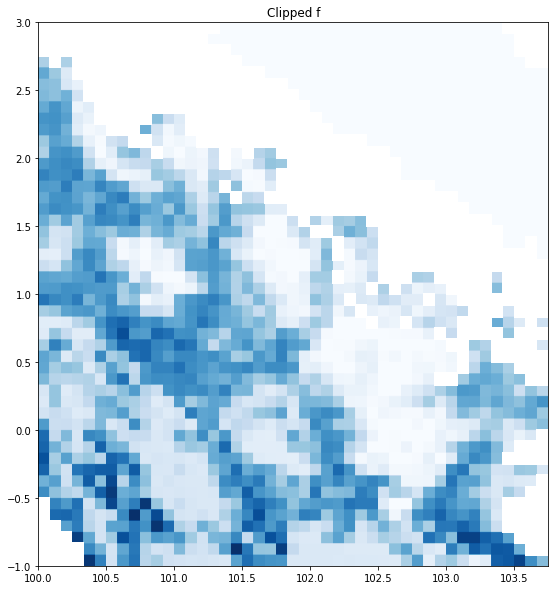

In [51]:
with rio.open(resampled_output) as src:
    image_array = src.read(1)
    meta = src.meta
    profile = src.profile
    
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(image_array, vmin=0, vmax=4e-4, cmap='Blues', ax=ax, transform=src.transform)
    ax.set_title('Resampled f')

In [99]:
## Had to clip both to match

defor_clipped_output = '../../datasets/processed/defor_clipped_2.tif'
clipped_output = '../../datasets/processed/cotton_HarvestedAreaFraction_clipped_2.tif'

resampled_output = '../../datasets/processed/cotton_HarvestedAreaFraction_resampled_30m.tif'
!gdalwarp -tr 0.000269494417976 0.000269495165055 -r mode -of GTiff $defor_path $defor_clipped_output

ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
Creating output file that is 14063P x 14995L.
Processing ../../datasets/processed/sat_loss_2018.tif [1/1] : 0Using internal nodata values (e.g. -3.40282e+38) for image ../../datasets/processed/sat_loss_2018.tif.
Copying nodata values from source ../../datasets/processed/sat_loss_2018.tif to destination ../../datasets/processed/defor_clipped_2.tif.
ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
...10...20...30...40...50...60...70...80...90...100 - done.


In [100]:
with rio.open(defor_clipped_output) as src:
    hf_array = src.read(1)
    meta1 = src.meta
    profile1 = src.profile
    
with rio.open(clipped_output) as src:
    defor_array = src.read(1)
    meta2 = src.meta
    profile2 = src.profile

In [101]:
import numpy as np

risk_array = np.multiply(defor_array, hf_array)

Text(0.5, 1.0, 'Risk')

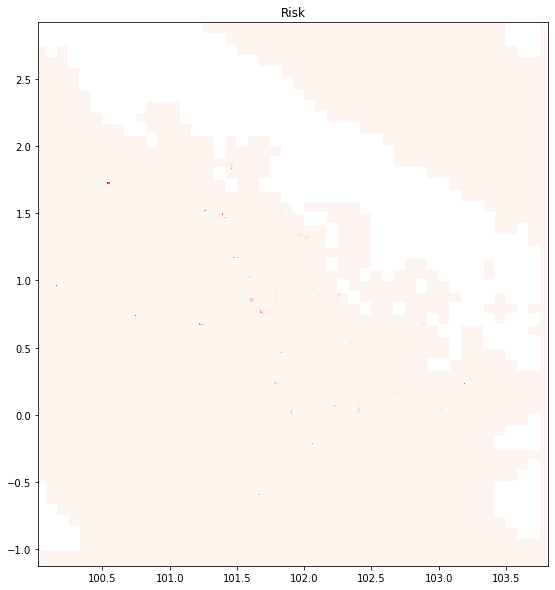

In [102]:
fig, ax = plt.subplots(figsize=[15,10])
rio.plot.show(risk_array, vmin=0, vmax=4e-4, cmap='Reds', ax=ax, transform=src.transform)
ax.set_title('Risk')

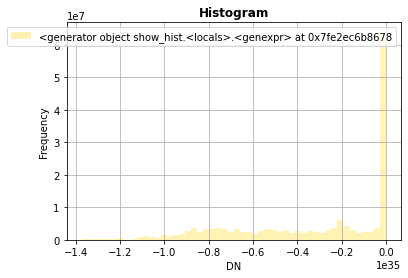

In [103]:
show_hist(
    risk_array, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")


### 1. Check raster info:

In [ ]:
!gdalinfo $ha_fraction_path

### 2. Extent: Calculation of Commodity-driven Deforestation Risk Metric inside location.

Using the Assignation Function (f') of each pixel:

`f' = (V * Af) / (AT * Y)`

- V = Volume of commodity Purchased
- Af = Area Fraction used to produce commodity (per pixel)
- AT = Total area used to produce commodity
- Y = Commodity yield (per pixel)

We then have a measure of the likelihood that the purchased commoity was sources inside a given pixel (0-1). 

From there we need to locate deforestation pixels and associate them with commodity pixels

### 3. Calculate risk 

### 4. Explore output:

### 4. Reproject raster from epsg:4326 to epsg:3857

Reproject raster from 4326 to 3857 as the hexgrid is in that projection. We can do it the other way around by reprojecting the vector layer from epsg:3857 to epsg:4326.